In [ ]:
!pip install easyocr

In [123]:
import cv2
import imutils
import easyocr

import numpy as np
import matplotlib.pyplot as plt

In [124]:
def get_plate_text(img_path):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  noise = cv2.bilateralFilter(gray, 15, 20, 20)
  edges = cv2.Canny(noise, 30, 200)

  points = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contour = imutils.grab_contours(points)
  contour = sorted(contour, key=cv2.contourArea, reverse=True)[:10]

  location = None
  for line in contour:
    approx = cv2.approxPolyDP(line, 10, True)
    if len(approx) == 4:
      location = approx
      break

  mask = np.zeros(gray.shape, np.uint8)
  new_img = cv2.drawContours(mask, [location], 0, 255, -1)
  new_img = cv2.bitwise_and(img, img, mask=mask)

  (x, y) = np.where(mask==255)
  (x1, y1) = (np.min(x), np.min(y))
  (x2, y2) = (np.max(x), np.max(y))
  plate = gray[x1:x2, y1:y2]

  reader = easyocr.Reader(['en'], verbose=False)
  plate_text = reader.readtext(plate)

  text = plate_text[0][-2]
  text = [l for l in text if l.islower() == 0]
  text = ''.join(text)
  rec_img = cv2.rectangle(img, (approx[0][0]), (approx[2][0]), (0, 255, 0), 2)

  plt.imshow(cv2.cvtColor(rec_img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(text);

  return text

'PGMN112'

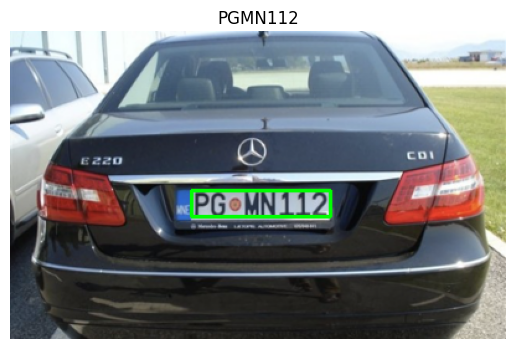

In [128]:
get_plate_text('data')